# Example - 1

In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\AI&NLP_morning_8-10\\TSF'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import Series
from numpy import log

In [3]:
df = pd.read_csv('AirPassenger.csv')
df.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [4]:
df.dtypes

Year-Month    object
Pax            int64
dtype: object

In [5]:
df = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'])
df.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
df.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [7]:
# It is recommended that we make our time series refrences as the Index
df = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col='Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df['Pax'][1]

118

In [10]:
# we con conveneintly do slicing i.e. obtain data from a specific time period
df['1951-01-01':'1955-12-01']

,Pax
Year-Month,
1951-01-01,145
1951-02-01,150
1951-03-01,178
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184


In [11]:
df.loc['1955-12-01']

Pax    278
Name: 1955-12-01 00:00:00, dtype: int64

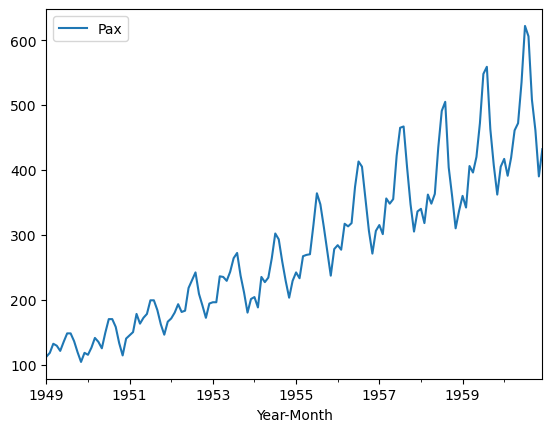

In [12]:
# plot the time series
df.plot()
plt.show()

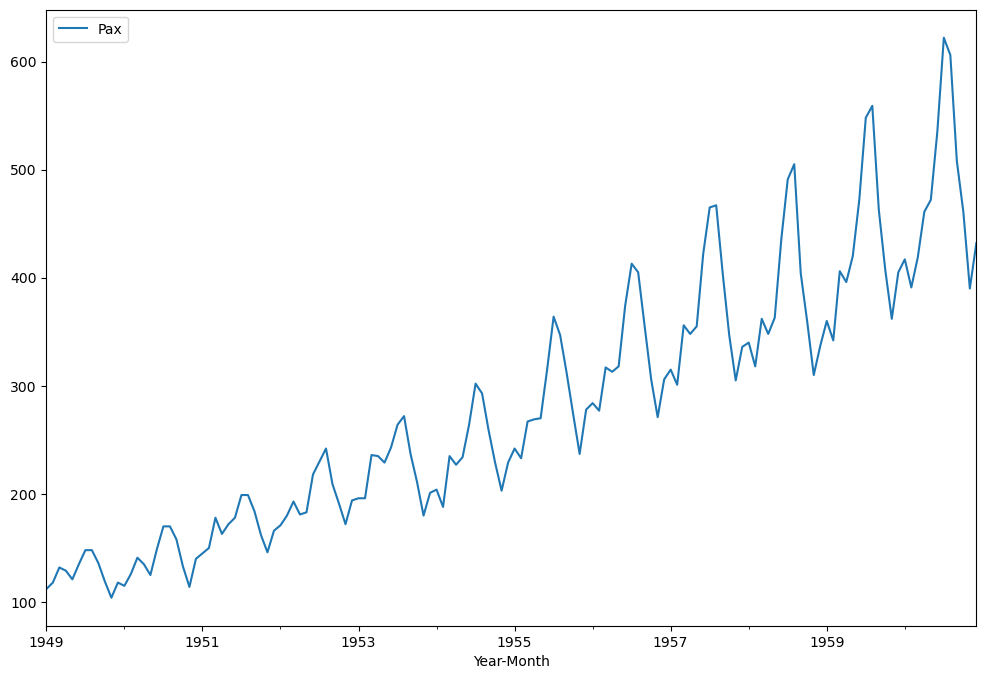

In [13]:
# Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df.plot()
plt.show()

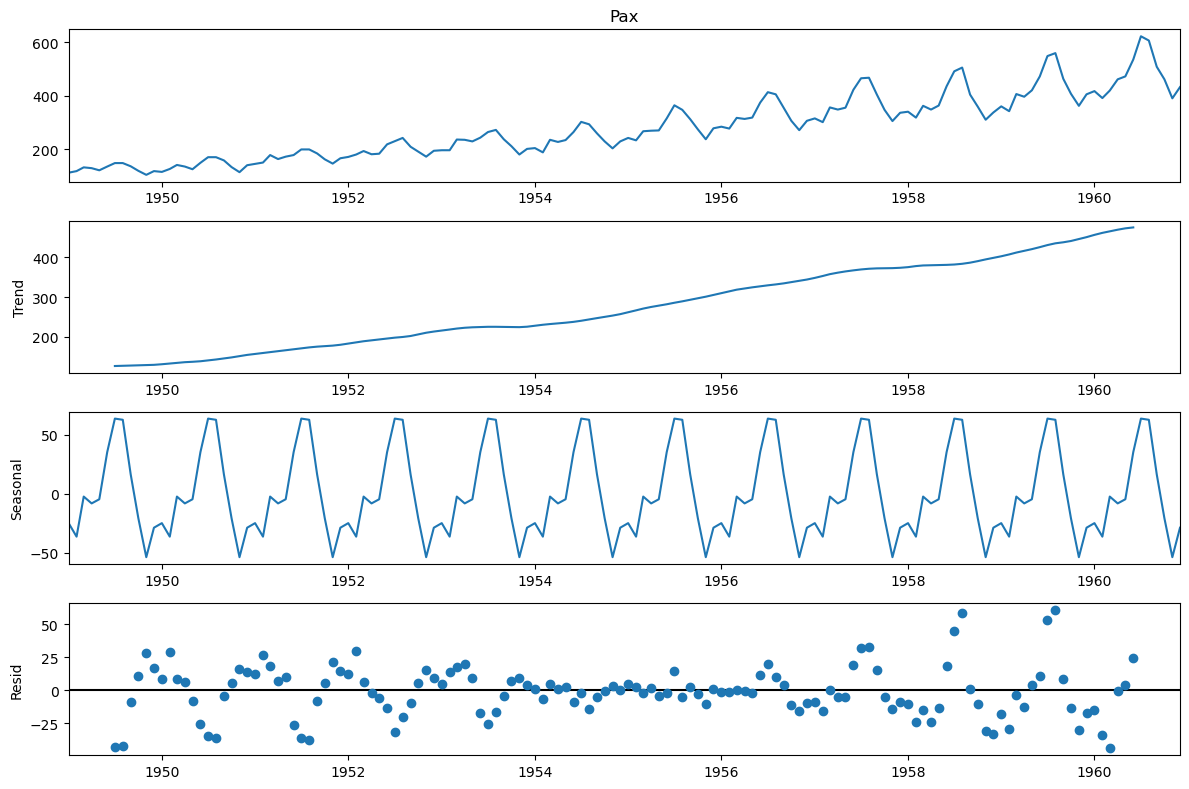

In [17]:
# Decompose to see the complete observation/component
# Decompose the time series additively
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Pax'],model='additive', period=12)
decompose.plot()
plt.show()

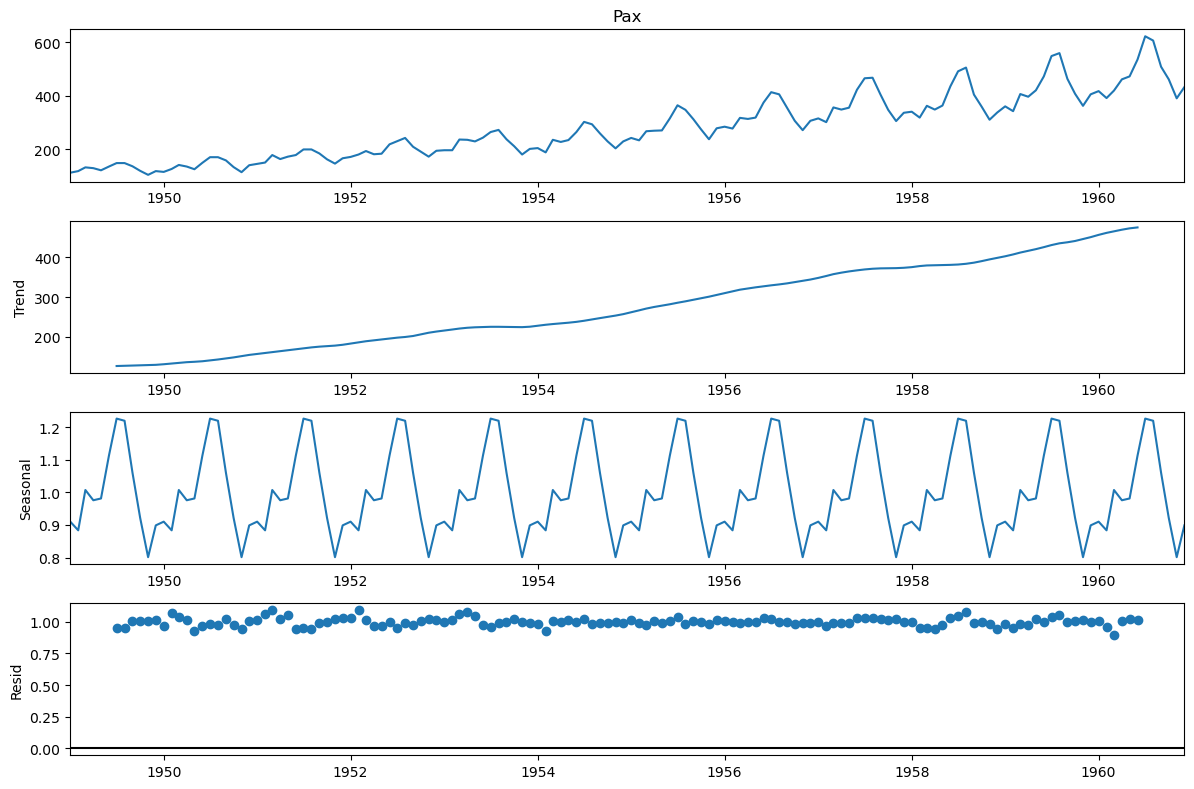

In [18]:
# Decompose the time series multiplicatively
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Pax'],model='multiplicative', period=12)
decompose.plot()
plt.show()

In [19]:
# Let's try to do log transformation
df_log = df.copy()

In [21]:
df_log['Pax'] = np.log(df)

In [22]:
df_log.Pax

Year-Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

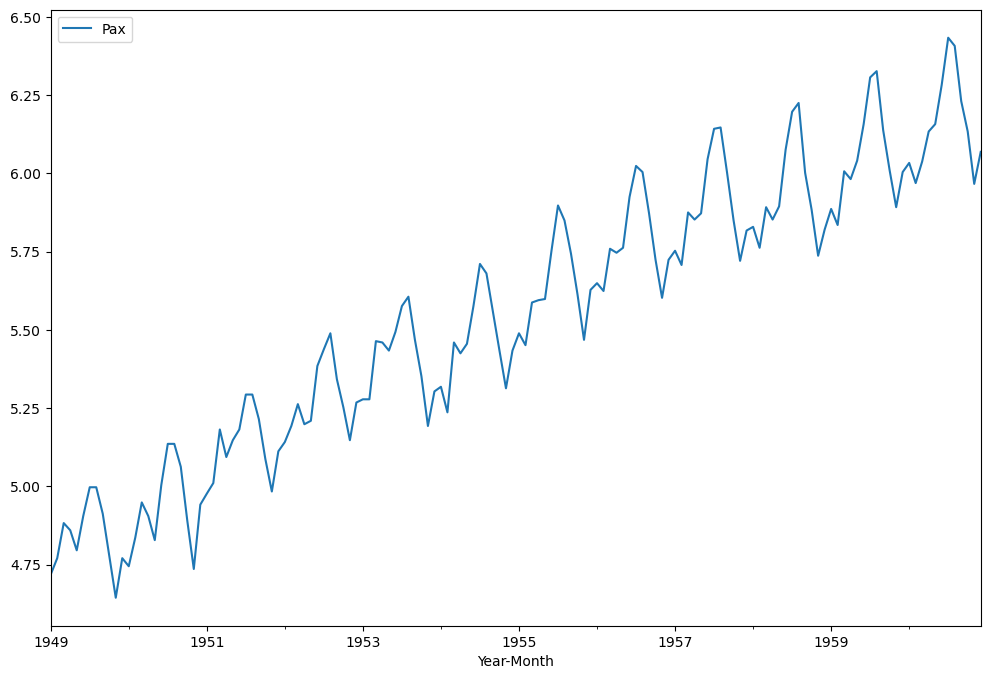

In [23]:
df_log.plot()
plt.show()

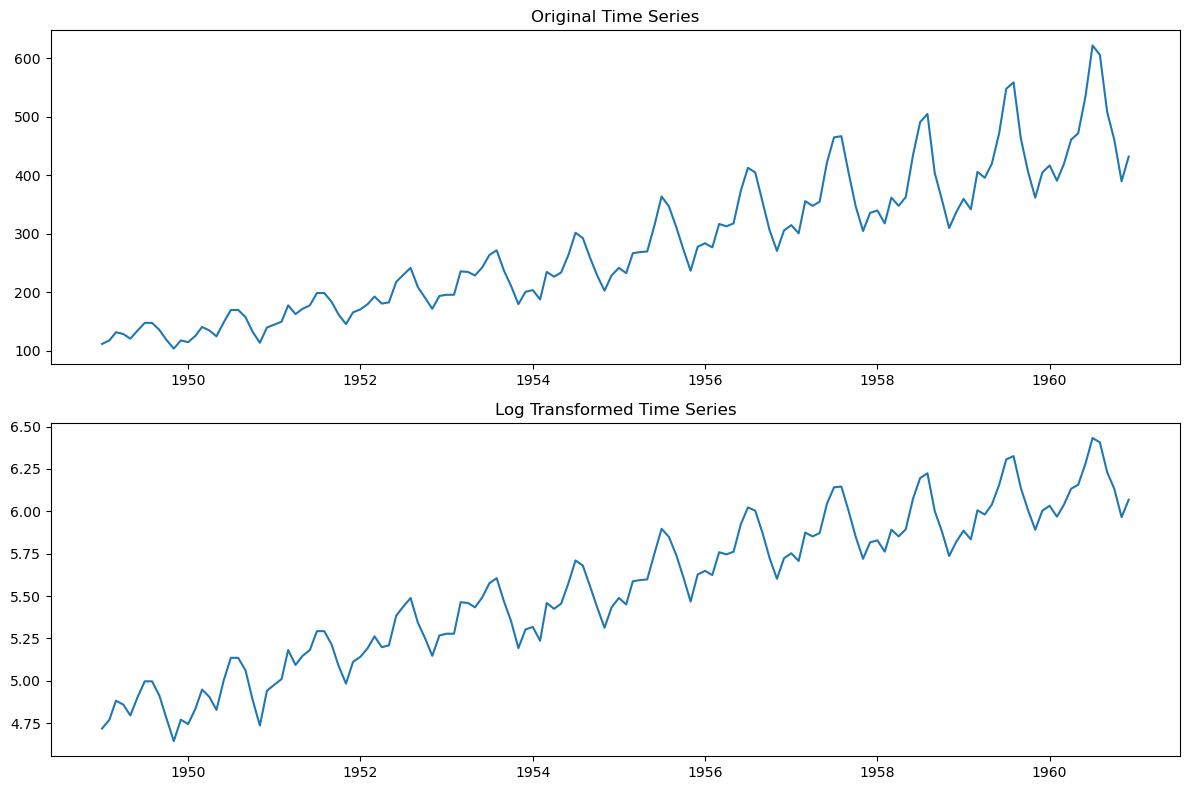

In [24]:
# Compare with the original series
plt.subplot(2,1,1)
plt.title("Original Time Series")
plt.plot(df)

plt.subplot(2,1,2)
plt.title("Log Transformed Time Series")
plt.plot(df_log)
plt.tight_layout()

# Example 2

In [25]:
df1 = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], index_col='Date')
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [26]:
df1.isnull().sum()

Births    0
dtype: int64

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


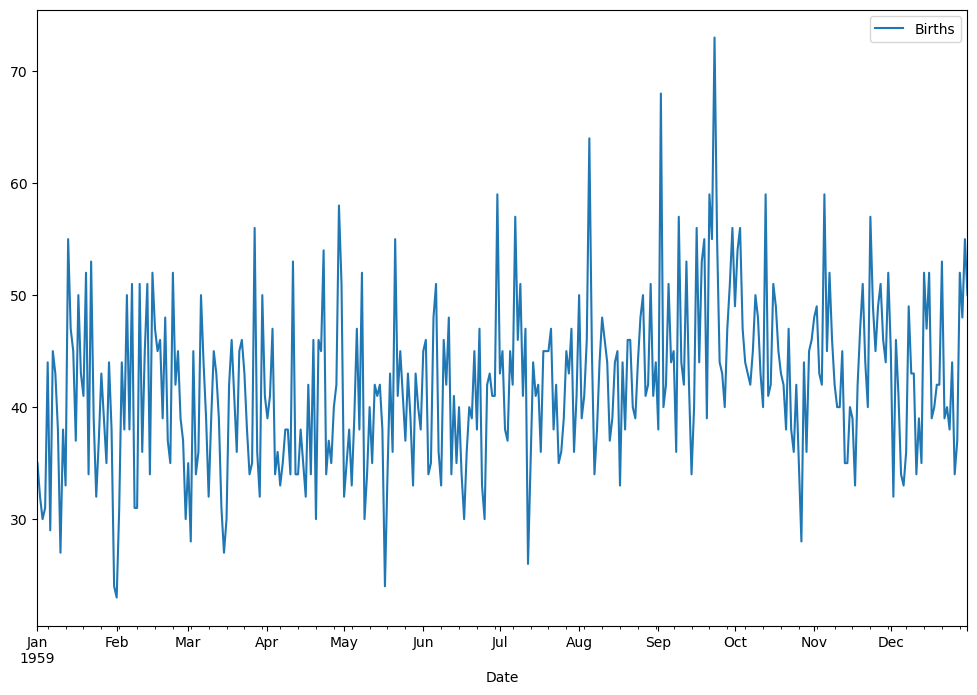

In [28]:
df1.plot()
plt.show()

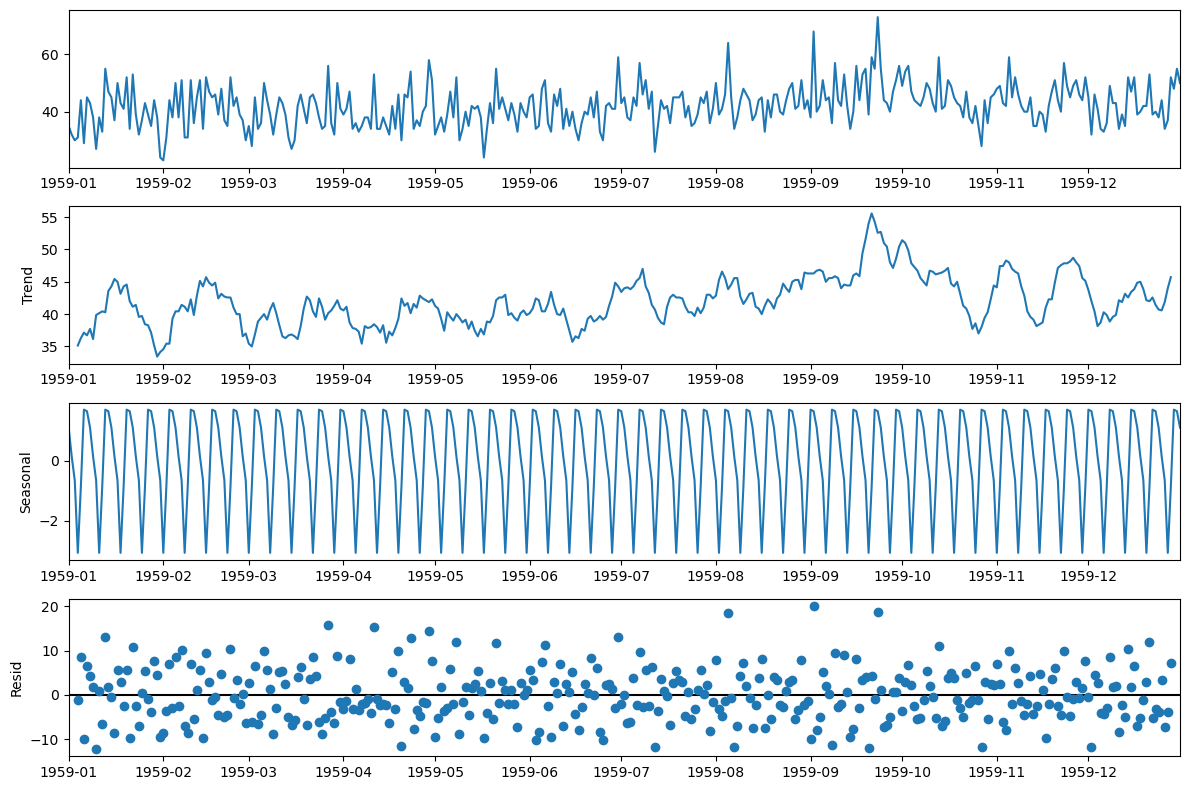

In [31]:
# Additive Decomposition
df1_add_decompose = seasonal_decompose(df1, model='additive')
df1_add_decompose.plot()
plt.show()

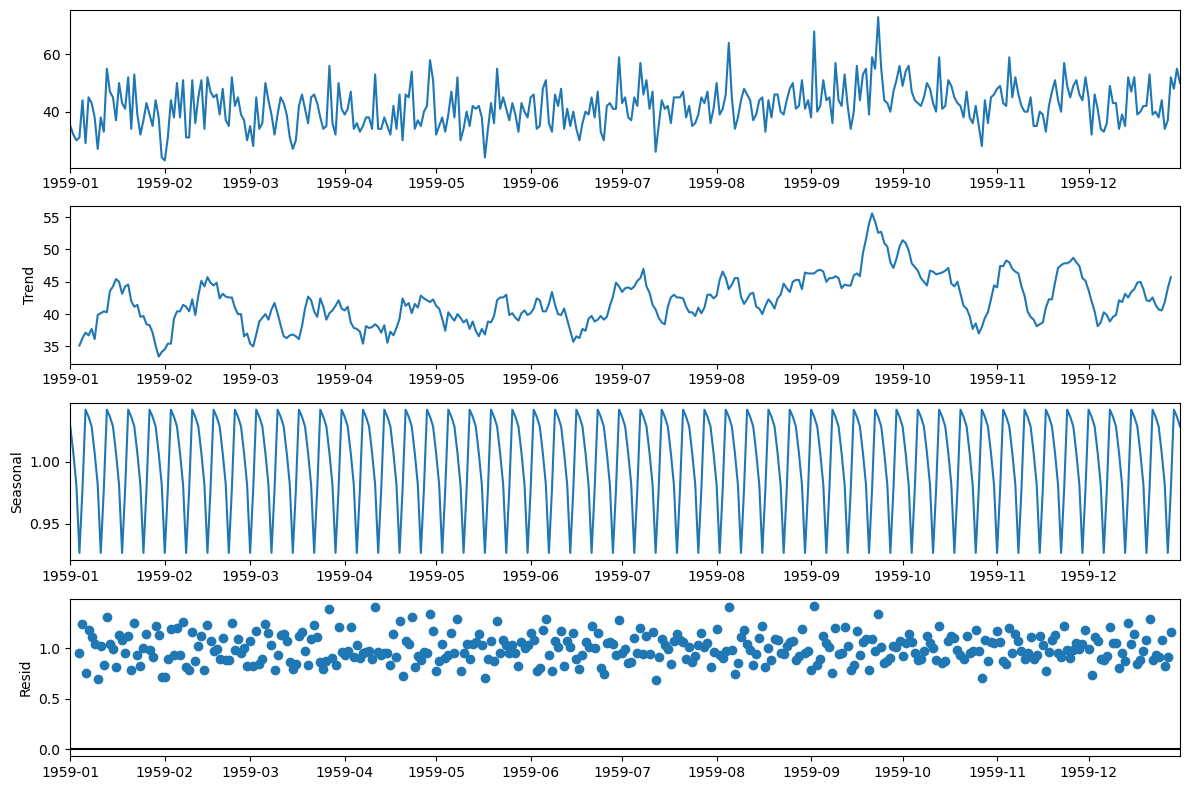

In [32]:
# multiplicative Decomposition
df1_mul_decompose = seasonal_decompose(df1, model='multiplicative')
df1_mul_decompose.plot()
plt.show()

In [33]:
# Let's inspect each component
df1_add_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [34]:
df1_add_decompose.seasonal

Date
1959-01-01    1.105812
1959-01-02    0.142226
1959-01-03   -0.656093
1959-01-04   -3.077608
1959-01-05   -0.868817
                ...   
1959-12-27   -3.077608
1959-12-28   -0.868817
1959-12-29    1.702450
1959-12-30    1.652030
1959-12-31    1.105812
Name: seasonal, Length: 365, dtype: float64

In [35]:
df1_add_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04   -1.065249
1959-01-05    8.583102
                ...   
1959-12-27   -3.922392
1959-12-28    7.154531
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [36]:
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [37]:
# Since this is an additive model
# Observed =  (Yt) = Trend(Tt) + Seasonal(St) + Irregular(It) shold hold
# trend = 35.142857 (4th one just for understanding)
# seasonal = -3.077608
# residual = -1.065249
Observed = 35.142857 - 3.077608 -1.065249
Observed

31.0

In [38]:
print(df1_mul_decompose.trend)
print(df1_mul_decompose.seasonal)
print(df1_mul_decompose.resid)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64
Date
1959-01-01    1.028509
1959-01-02    1.007079
1959-01-03    0.981494
1959-01-04    0.926726
1959-01-05    0.977911
                ...   
1959-12-27    0.926726
1959-12-28    0.977911
1959-12-29    1.041987
1959-12-30    1.036295
1959-12-31    1.028509
Name: seasonal, Length: 365, dtype: float64
Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04    0.951861
1959-01-05    1.239989
                ...   
1959-12-27    0.907398
1959-12-28    1.163194
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64


In [39]:
# multiplicative
observed_mul = 35.142857 * 0.926726 * 0.951861
observed_mul

31.000018005863094

# Downsampling

In [40]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [41]:
# Let's change the monthly series to quartly. This would require aggregation
df_q = df.resample('Q').mean()

In [42]:
df_q

,Pax
Year-Month,
1949-03-31,120.666667
1949-06-30,128.333333
1949-09-30,144.000000
1949-12-31,113.666667
1950-03-31,127.333333
1950-06-30,136.333333
1950-09-30,166.000000
1950-12-31,129.000000
1951-03-31,157.666667


<AxesSubplot:xlabel='Year-Month'>

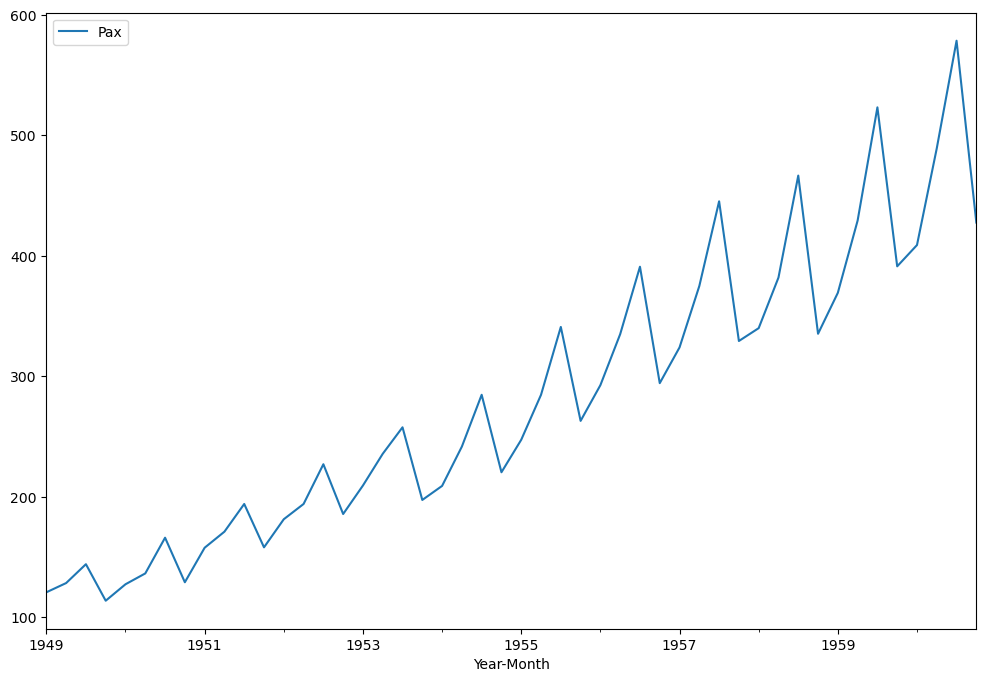

In [43]:
df_q.plot()

# Upsampling

In [44]:
# let's change the monthly series to daily
df_d = df.resample('D').ffill()

In [45]:
df_d

,Pax
Year-Month,
1949-01-01,112
1949-01-02,112
1949-01-03,112
1949-01-04,112
1949-01-05,112
...,...
1960-11-27,390
1960-11-28,390
1960-11-29,390


In [47]:
df_d['1949-03']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7992\2851580184.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_d['1949-03']


,Pax
Year-Month,
1949-03-01,132
1949-03-02,132
1949-03-03,132
1949-03-04,132
1949-03-05,132
1949-03-06,132
1949-03-07,132
1949-03-08,132
1949-03-09,132


<AxesSubplot:xlabel='Year-Month'>

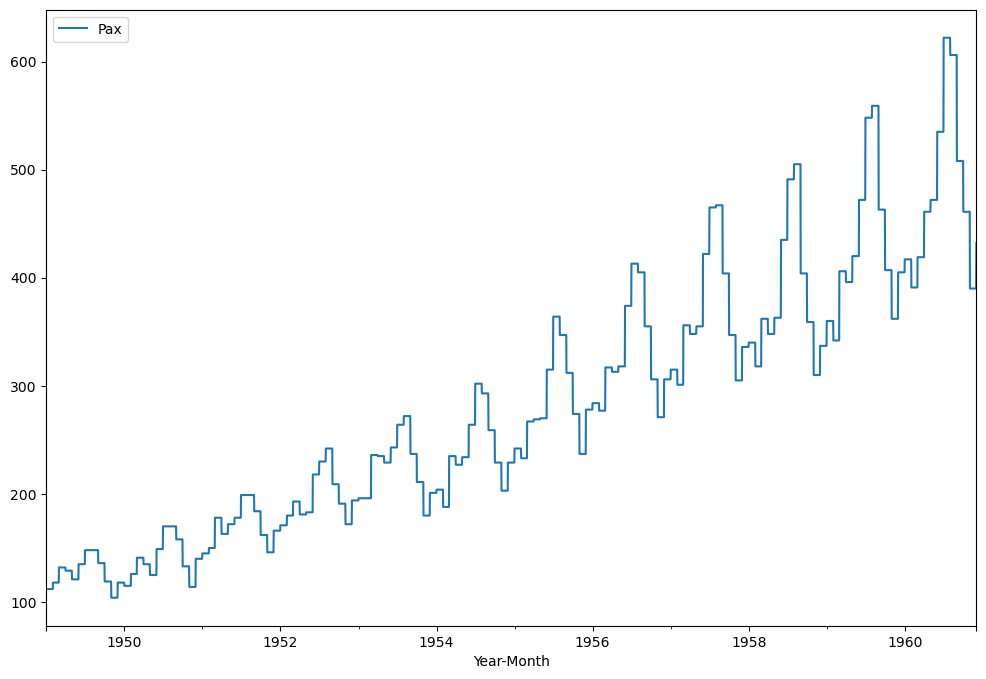

In [48]:
df_d.plot()

In [49]:
# Let's change the montly series to hourly 
df_h = df.resample('H').interpolate()

In [50]:
df_h

,Pax
Year-Month,
1949-01-01 00:00:00,112.000000
1949-01-01 01:00:00,112.008065
1949-01-01 02:00:00,112.016129
1949-01-01 03:00:00,112.024194
1949-01-01 04:00:00,112.032258
...,...
1960-11-30 20:00:00,431.766667
1960-11-30 21:00:00,431.825000
1960-11-30 22:00:00,431.883333


<AxesSubplot:xlabel='Year-Month'>

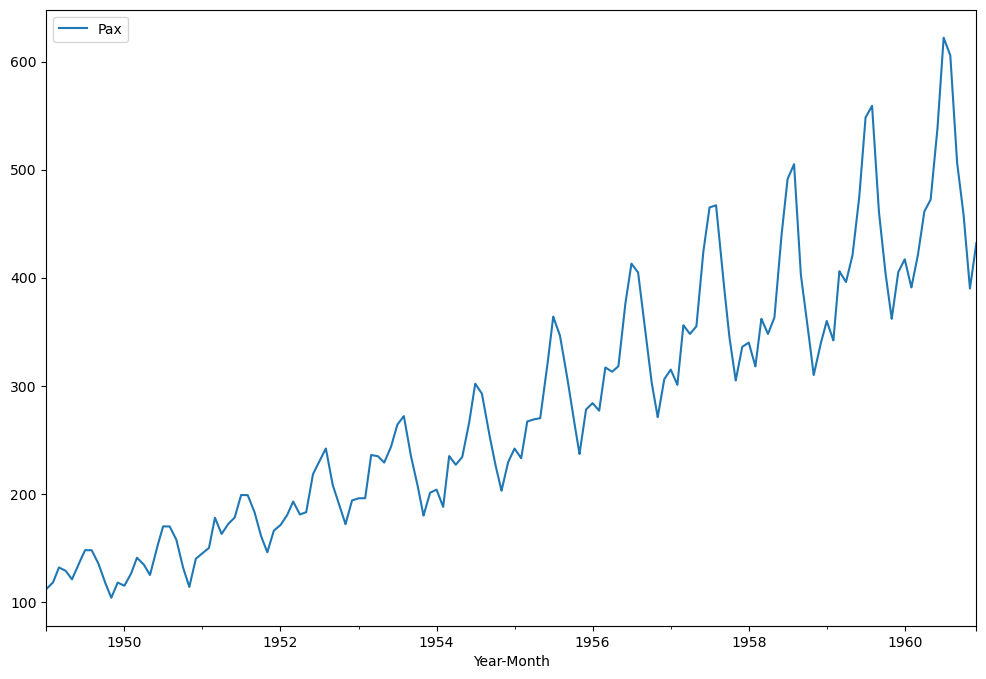

In [51]:
df_h.plot()